# Multi-armed bandit problem

In [19]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt

from multi_armed_bandit import TestBed, GreedyAgent, Simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
simulation = Simulation(
    env_type=TestBed,
    num_arms=10,
    agent_type=GreedyAgent,
    num_agents=1000,
    init_value=0,
    step=1000)
simulation.run_all_agents()

Simulation running: 100%|██████████| 1000/1000 [00:46<00:00, 21.31it/s]


<IPython.core.display.Javascript object>


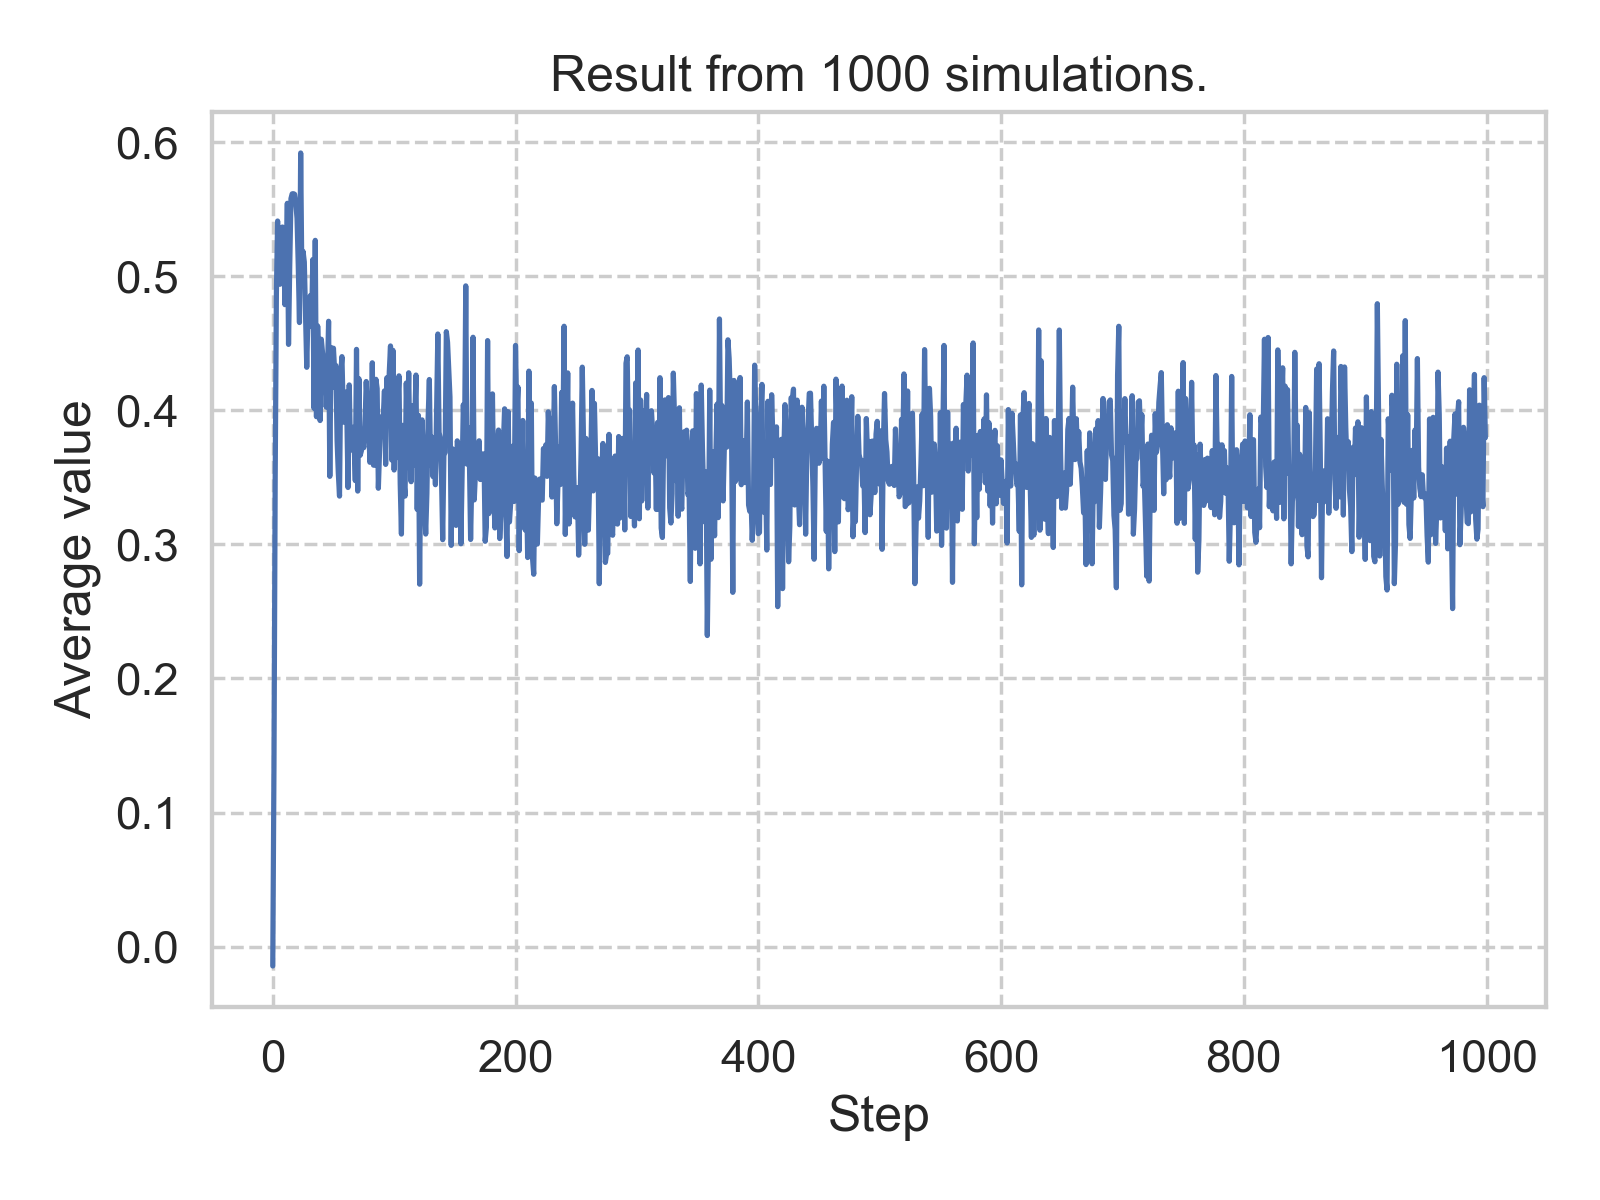

In [25]:
simulation.aggregate_results()